In [1]:
import cv2, imutils
import matplotlib.pyplot as plt
import numpy as np

In [82]:
def implot(image):
    plt.imshow(image,cmap = 'gray')
    plt.show(image.any)
    
def preprocess(image):
    im_resize = imutils.resize(image, width=300)
    im_gray = cv2.cvtColor(im_resize, cv2.COLOR_BGR2GRAY)
    
    return im_gray

def threshold(image):
    im_blur = cv2.GaussianBlur(image, (1, 1), 0)
    im_final = cv2.threshold(im_blur, 127, 255, cv2.THRESH_BINARY)[1]

    return im_final

# Contour Detection

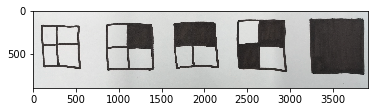

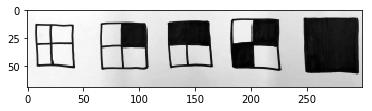

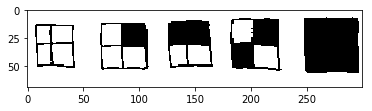

In [83]:
imagePath = 'images/2d.jpg'
image = cv2.imread(imagePath)
im_process = preprocess(image)
im_thresh = threshold(im_process)
implot(image)
implot(im_process)
implot(im_thresh)

1337.0
1812.0
1630.0
2016.0
2447.0


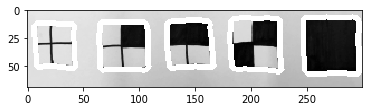

In [86]:
# Contour Area Detection
imCopy = im_process.copy()
_, contours, _ = cv2.findContours(im_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
for contour in contours:
    area = cv2.contourArea(contour)
    if 1000 <area < 3000:
        print(area)
        cv2.drawContours(imCopy, contour, -1, (255, 0, 0), 3)
implot(imCopy)

# Blob Detection

[<KeyPoint 0x1196889f0>, <KeyPoint 0x111c128d0>, <KeyPoint 0x12024d120>, <KeyPoint 0x12024d840>]


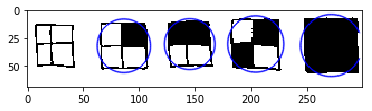

In [89]:
# Blob Detection

# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector_create()

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()
 
# Change thresholds
params.minThreshold = 10;
params.maxThreshold = 200;
 
# Filter by Area.
params.filterByArea = True
params.minArea = 100
 
# Filter by Circularity
params.filterByCircularity = False
params.minCircularity = 0.1
 
# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.87
 
# Filter by Inertia
params.filterByInertia = False
params.minInertiaRatio = 0.01
 
# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
    detector = cv2.SimpleBlobDetector(params)
else : 
    detector = cv2.SimpleBlobDetector_create(params)
    
keypoints = detector.detect(im_thresh)
print(keypoints)

# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im_thresh, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

implot(im_with_keypoints)